TITANIC SURVIVED PROJECT

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Study And Clean The Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- From above analysis we know that there are null columns in the dataset
- We can use isnull to confirm this

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Since, Majority cells are empty for 'Cabin' we will delete this column and Impute values for 'Age' and Embarked columns

I'll use Iterative Imputer for Imputing these, But first. I'll have to encode the categorical columns

I'll use Label Encoder for encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

In [10]:
df_sex = lab.fit_transform(df['Sex'])
pd.Series(df_sex)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Length: 891, dtype: int32

In [11]:
df['Sex'] = df_sex
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [12]:
df_embarked = lab.fit_transform(df['Embarked'])
pd.Series(df_embarked)

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [13]:
df['Embarked'] = df_embarked
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [6]:
from sklearn.experimental import enable_iterative_imputer

In [7]:
from sklearn.impute import IterativeImputer

In [14]:
iter_impute = IterativeImputer()
ite_imp = pd.DataFrame(iter_impute.fit_transform
                      (df[['Age','Embarked']]),
                      columns = ['Age','Embarked'])
ite_imp

,Age,Embarked
0,22.000000,2.0
1,38.000000,0.0
2,26.000000,2.0
3,35.000000,2.0
4,35.000000,2.0
...,...,...
886,27.000000,2.0
887,19.000000,2.0
888,29.698603,2.0
889,26.000000,0.0


In [15]:
df.drop(['PassengerId','Name','Ticket','Cabin','Age','Embarked'], axis = 1, inplace = True)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,1,1,0,7.2500
1,1,1,0,1,0,71.2833
2,1,3,0,0,0,7.9250
3,1,1,0,1,0,53.1000
4,0,3,1,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000
887,1,1,0,0,0,30.0000
888,0,3,0,1,2,23.4500
889,1,1,1,0,0,30.0000


In [17]:
df = df.join(ite_imp)
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,1,1,0,7.2500,22.000000,2.0
1,1,1,0,1,0,71.2833,38.000000,0.0
2,1,3,0,0,0,7.9250,26.000000,2.0
3,1,1,0,1,0,53.1000,35.000000,2.0
4,0,3,1,0,0,8.0500,35.000000,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,27.000000,2.0
887,1,1,0,0,0,30.0000,19.000000,2.0
888,0,3,0,1,2,23.4500,29.698603,2.0
889,1,1,1,0,0,30.0000,26.000000,0.0


We have now deleted all unnecessary columns and filled all null values

We can now move onto checking skewness in our data

In [18]:
import warnings
warnings.filterwarnings('ignore')

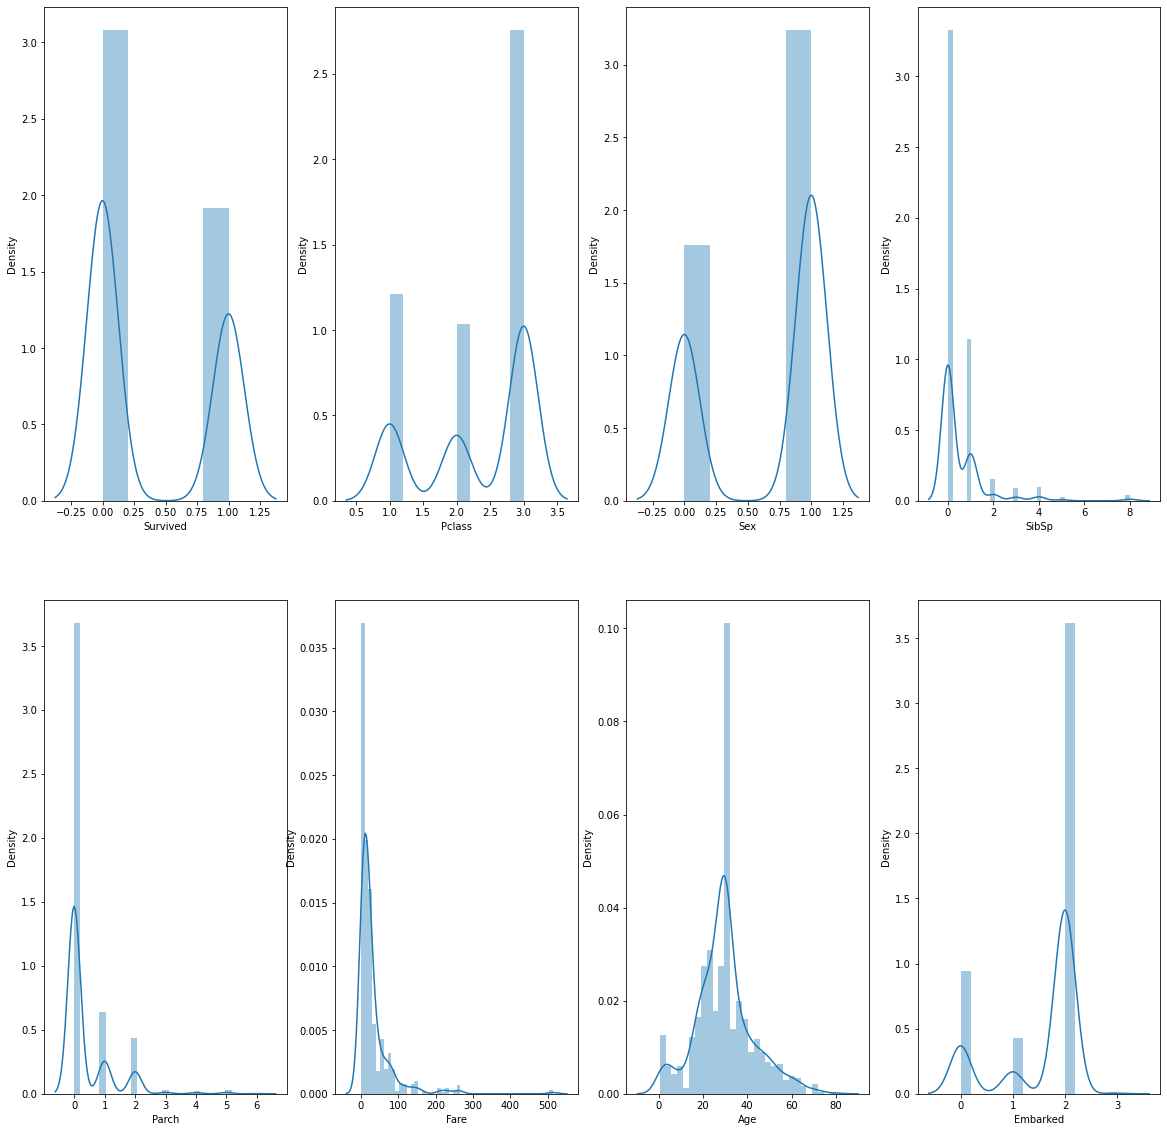

In [20]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see, there is skewness in some columns - SibSp, Parh, Fare, Age and Embarked.
We will use zscore to remove this skewness

In [21]:
from scipy import stats
from scipy.stats import zscore

z_score = zscore(df[['SibSp', 'Parch', 'Fare', 'Age', 'Embarked']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0,3,1,1,0,7.2500,22.000000,2.0
1,1,1,0,1,0,71.2833,38.000000,0.0
2,1,3,0,0,0,7.9250,26.000000,2.0
3,1,1,0,1,0,53.1000,35.000000,2.0
4,0,3,1,0,0,8.0500,35.000000,2.0
5,0,3,1,0,0,8.4583,29.699887,1.0
6,0,1,1,0,0,51.8625,54.000000,2.0
7,0,3,1,3,1,21.0750,2.000000,2.0
8,1,3,0,0,2,11.1333,27.000000,2.0
9,1,2,0,1,0,30.0708,14.000000,0.0


Check skewness again post treatment

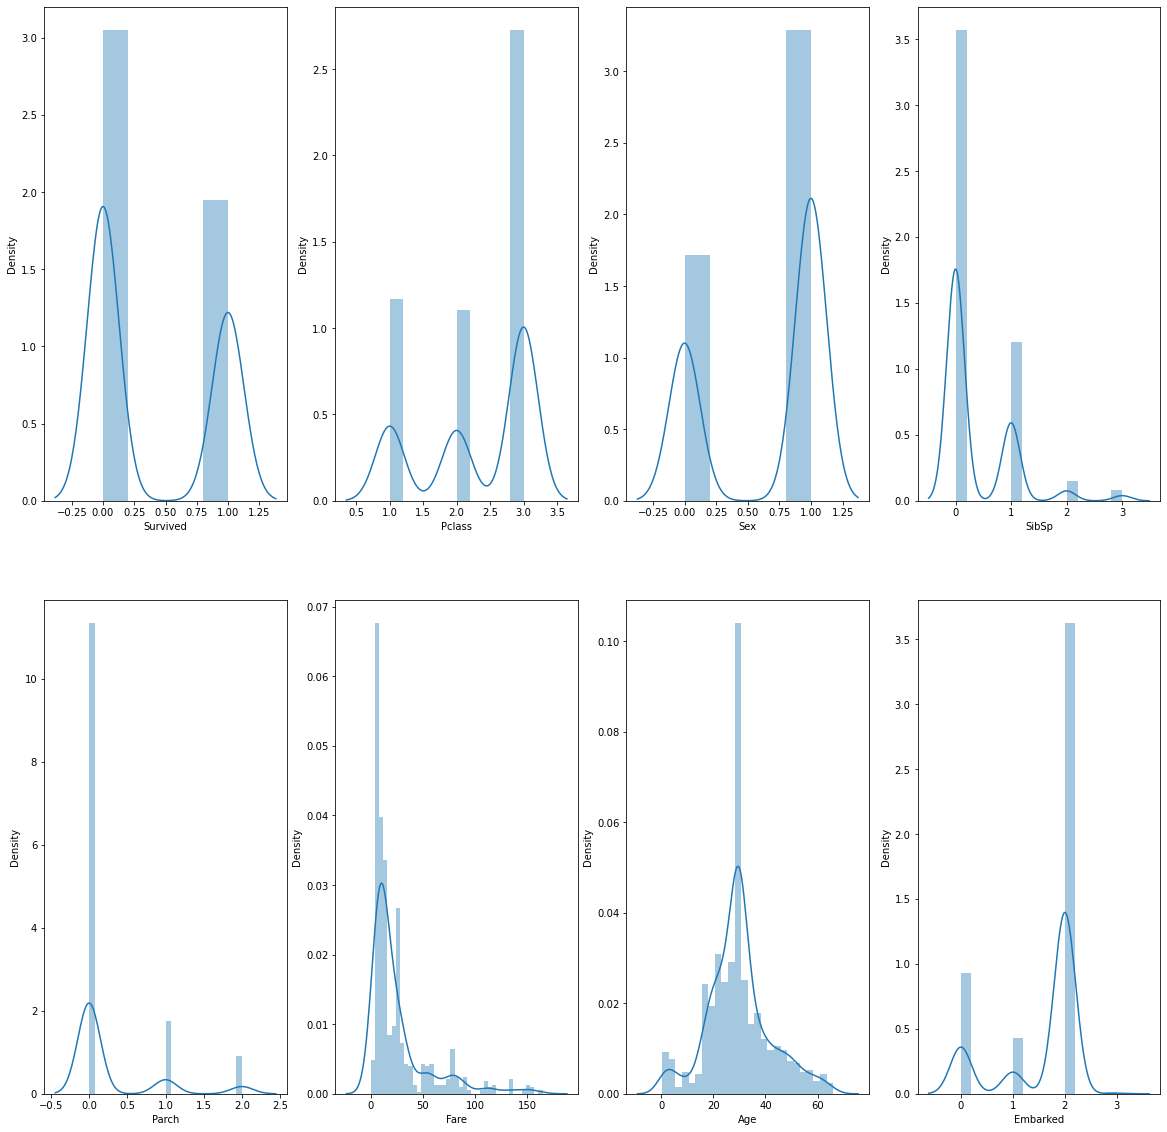

In [22]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

We can see, the skewness has significantly improved in most columns

We should now check the Heatmap, to ensure there is no multi-collinearity problem occuring which may lead to overfitting our model

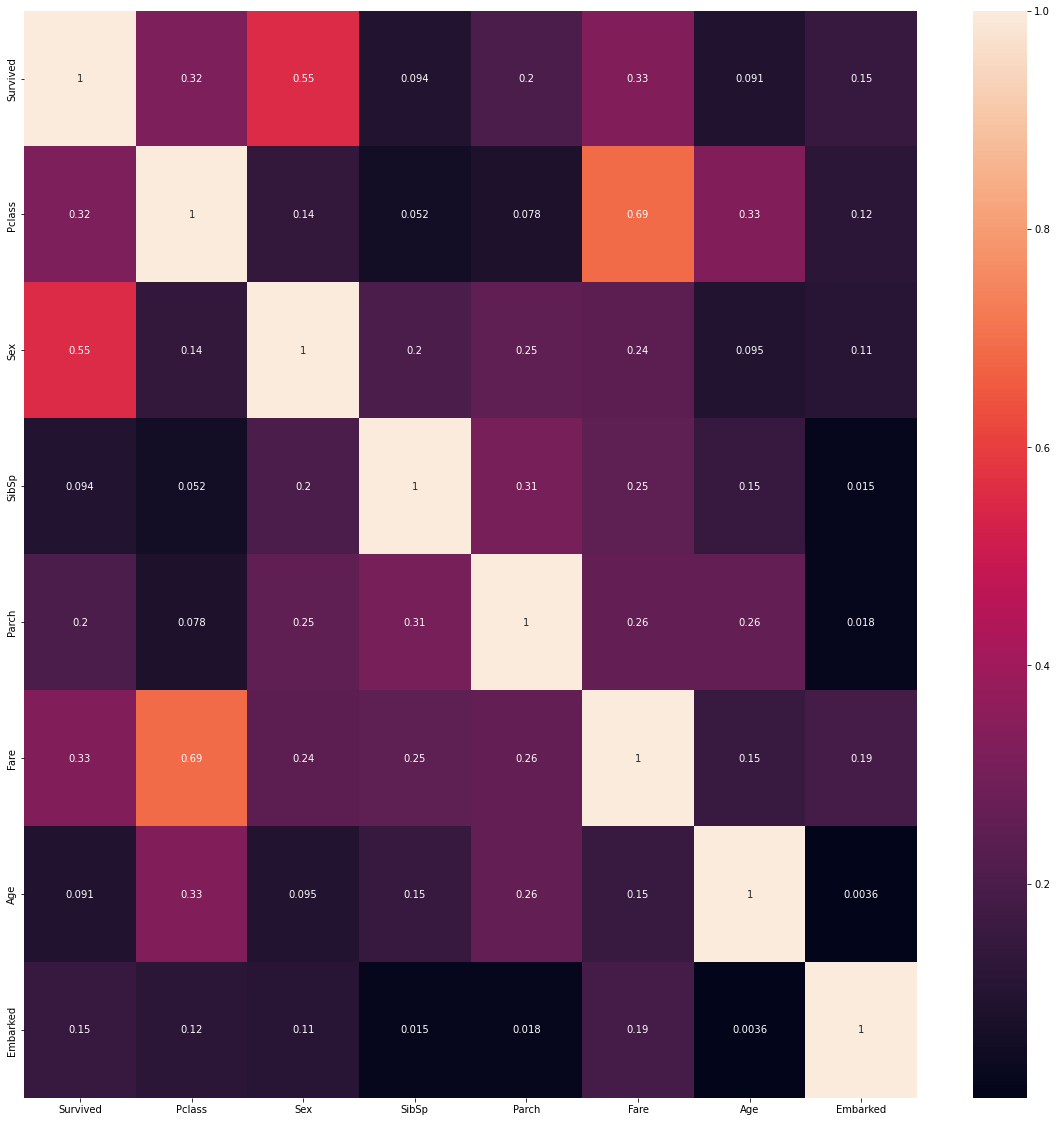

In [23]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

We can note: Fare and Pclass show collinearity, we will do further analysis for it

<function matplotlib.pyplot.show(close=None, block=None)>

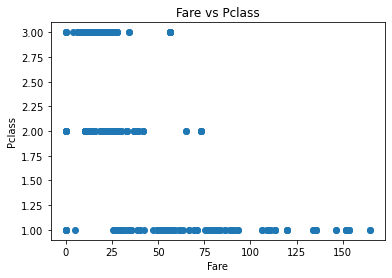

In [24]:
plt.scatter(df['Fare'], df['Pclass'])
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.title('Fare vs Pclass')
plt.show

We can note, Fare and Pclass do show some relation, but not enough to delete either column, so we will continue as is.

We can now seperate our target and feature columns

In [25]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [26]:
x

,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,3,1,1,0,7.2500,22.000000,2.0
1,1,0,1,0,71.2833,38.000000,0.0
2,3,0,0,0,7.9250,26.000000,2.0
3,1,0,1,0,53.1000,35.000000,2.0
4,3,1,0,0,8.0500,35.000000,2.0
...,...,...,...,...,...,...,...
886,2,1,0,0,13.0000,27.000000,2.0
887,1,0,0,0,30.0000,19.000000,2.0
888,3,0,1,2,23.4500,29.698603,2.0
889,1,1,0,0,30.0000,26.000000,0.0


In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

Now, for accurate predictions, we need to balance our target variable

- Check balance using Counter

In [28]:
from collections import Counter
Counter(y)

Counter({0: 500, 1: 320})

We can see our target variable is slightly imbalanced and we need to balance it

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
x_train1,x_test,y_train1,y_test = train_test_split(x,y,test_size=0.25,random_state=69)

In [31]:
Counter(y_train1)

Counter({0: 379, 1: 236})

In [32]:
sm = SMOTE(sampling_strategy=0.8)

In [33]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 379, 1: 236}) 
Classes after fitCounter({0: 379, 1: 303}) 


Now that we have balanced our target variable, we can begin Model Training and Testing

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [37]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 80.79%

 ======TESTING RESULT======
Accuracy Score: 76.10%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       121
           1       0.70      0.74      0.72        84

    accuracy                           0.76       205
   macro avg       0.75      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



We can note our Training Accuracy with Logistic Regression: 80.79% and Testing is: 76.10% I can consider this a decent score and as out training and testing data are close, we can conclude the model is not overfitting

We should now test the data on other models as well to check which model is giving us the best result

In [38]:
from xgboost import XGBClassifier

In [39]:
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
xgb = XGBClassifier()

In [40]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

Check Testing Accuracies for other models:

In [41]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7609756097560976
0.7024390243902439
0.8097560975609757
0.8
0.824390243902439


Now that we have checked the accuracy for all models, we should plot the ROC-AUC curve to check the best fit model

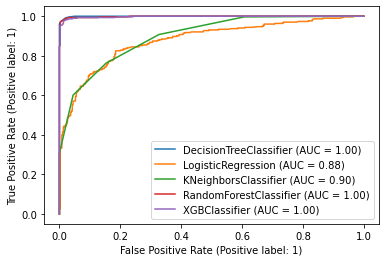

In [43]:
#CHECK ROC AUC CURVE FOR TRAINING

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

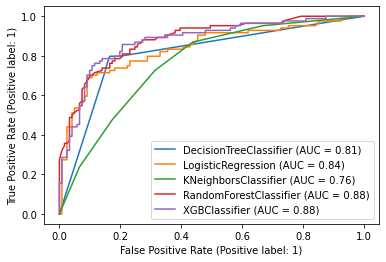

In [44]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

We can note below pointers from above graphs:

- Decision Tree, Random Forest and XGB have perfect or near perfect learning rate on training data.
- Although great learning rate, the accuracy for Decision Tree, KNeghbors, RandomfOREST and XGB are very low in comparison: Model is Overfitting a lot
- Logistic Regression has poorer testing and training accuracy but no overfitting problem
- Logistic Regression will be my model of choice